#importing libraries

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
import warnings
import os

#loading dataset

In [ ]:
#loading the datset
df=pd.read_csv('/content/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#univariate analysis

<ipython-input-3-5d5f89002da6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color='r')
<ipython-input-3-5d5f89002da6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


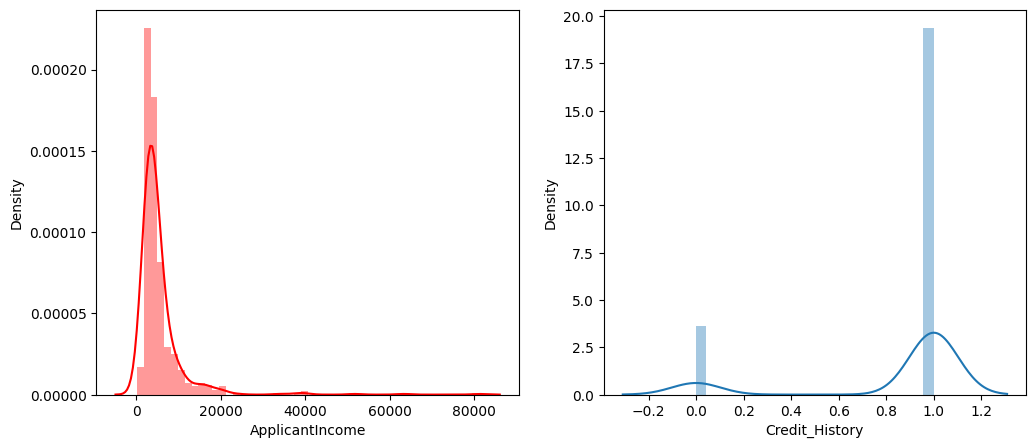

In [ ]:
#distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(df['Credit_History'])
plt.show()

#bivariate analysis

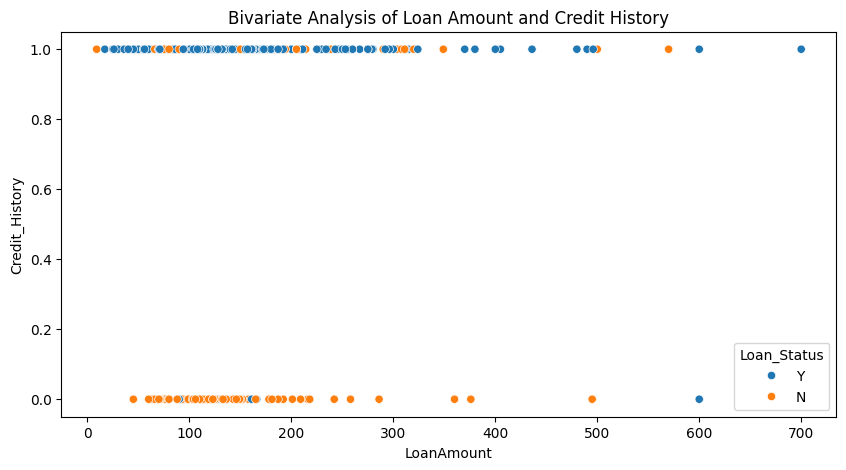

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='LoanAmount', y='Credit_History', data=df, hue='Loan_Status')
plt.title('Bivariate Analysis of Loan Amount and Credit History')
plt.show()

<ipython-input-5-e6918b950db3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i+1)


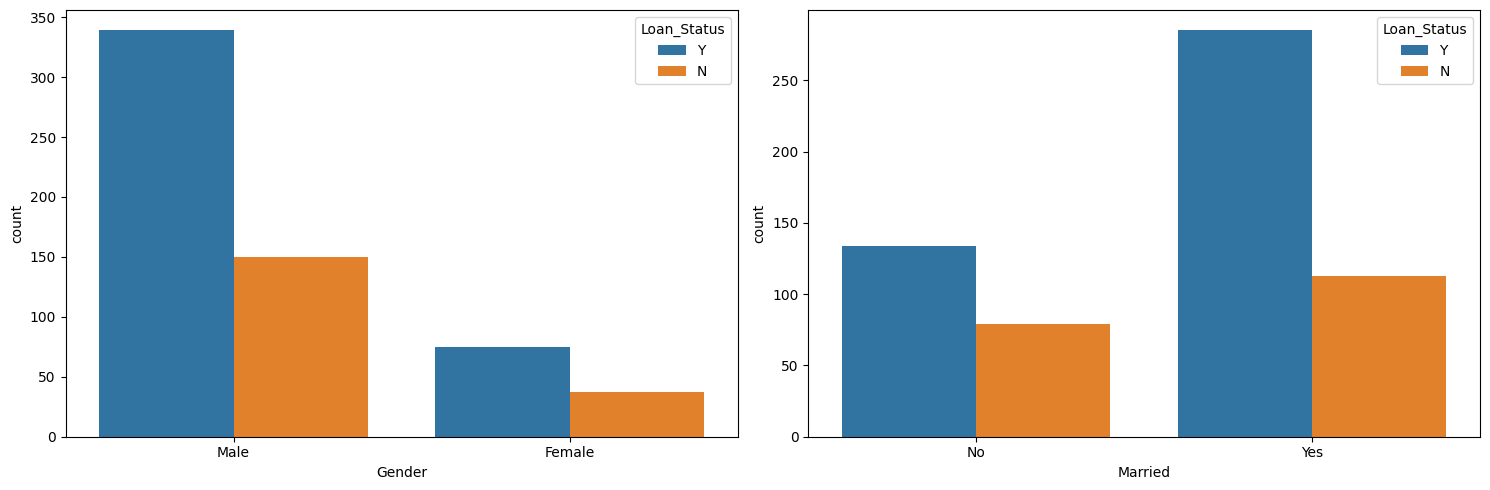

In [ ]:
#plotting the count plot
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sns.countplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

#multivariate analysis

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


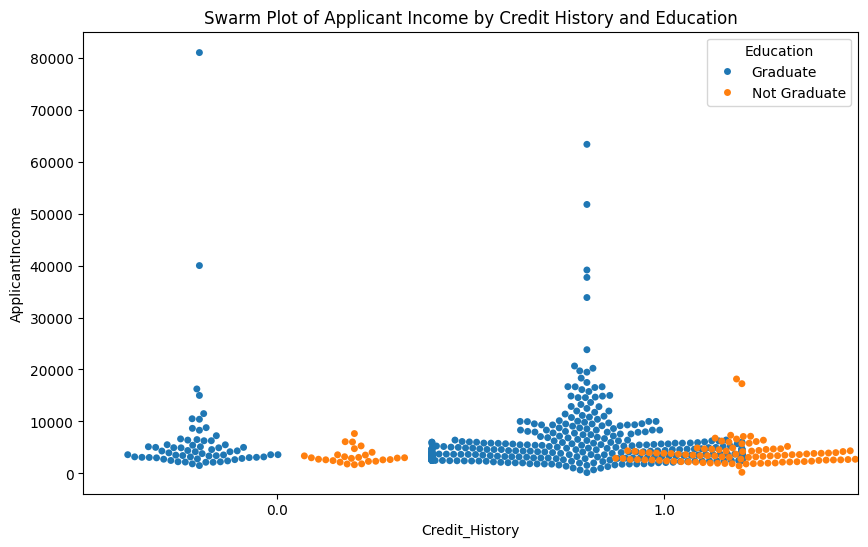

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Credit_History', y='ApplicantIncome', hue='Education', data=df, dodge=True)
plt.title('Swarm Plot of Applicant Income by Credit History and Education')
plt.legend(title='Education')
plt.show()

#descriptive analysis

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#data preprocessing
#handling null values

In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
#fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].str.replace('+','')
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#handling categorical values

In [ ]:
df['Gender']=df['Gender'].map({'Female':1,'Male':0})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [ ]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [ ]:
df['Gender']=df['Gender'].astype('int64')
df['Married']=df['Married'].astype('int64')
df['Dependents']=df['Dependents'].astype('int64')
df['Self_Employed']=df['Self_Employed'].astype('int64')
df['CoapplicantIncome']=df['CoapplicantIncome'].astype('int64')
df['LoanAmount']=df['LoanAmount'].astype('int64')
df['Loan_Amount_Term']=df['Loan_Amount_Term'].astype('int64')
df['Credit_History']=df['Credit_History'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    int64 
 2   Married            614 non-null    int64 
 3   Dependents         614 non-null    int64 
 4   Education          614 non-null    int64 
 5   Self_Employed      614 non-null    int64 
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    int64 
 12  Loan_Status        614 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 62.5+ KB


In [ ]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int64
 1   Married            614 non-null    int64
 2   Dependents         614 non-null    int64
 3   Education          614 non-null    int64
 4   Self_Employed      614 non-null    int64
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int64
 11  Loan_Status        614 non-null    int64
dtypes: int64(12)
memory usage: 57.7 KB


#balancing dataset

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote=SMOTETomek()

In [ ]:
y=df['Loan_Status']
x=df.drop(columns=['Loan_Status'],axis=1)

In [ ]:
x_bal,y_bal=smote.fit_resample(x,y)

In [ ]:
print(y.value_counts())
print(y_bal.value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64
Loan_Status
1    349
0    349
Name: count, dtype: int64


#scaling

In [ ]:
!pip install scikit-learn==1.2.2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=pd.DataFrame(sc.fit_transform(x_bal),columns=x_bal.columns)

#train and test split

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.2,random_state=42)

#model building

In [ ]:
def DecisionTree(x_train,x_test,y_train,y_test):
    dt_model= DecisionTreeClassifier()
    dt_model.fit(x_train, y_train)
    dt_pred=dt_model.predict(x_test)
    print("***Decision Tree Classifier")
    print('confusion atrix')
    print(confusion_matrix(y_test,dt_pred))
    print('classification report')
    print(classification_report(y_test,dt_pred))

In [ ]:
def RandomForest(x_train,x_test,y_train,y_test):
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    rf_pred=rf_model.predict(x_test)
    print("***RandomForestClassifier***")
    print('confusion matrix')
    print(confusion_matrix(y_test,rf_pred))
    print('classification report')
    print(classification_report(y_test,rf_pred))

In [ ]:
def KNN(x_train,x_test,y_train,y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(x_train, y_train)
    knn_pred=knn_model.predict(x_test)
    print("***KNeighborsClassifier***")
    print('confusion matrix')
    print(confusion_matrix(y_test,knn_pred))
    print('classification report')
    print(classification_report(y_test,knn_pred))

In [ ]:
from xgboost import XGBClassifier
def xgboost(x_train,x_test,y_train,y_test):
    xgb_model = XGBClassifier()
    xgb_model.fit(x_train, y_train)
    xgb_pred=xgb_model.predict(x_test)
    print("***GradientBoostingClassifier***")
    print('confusion matrix')
    print(confusion_matrix(y_test,xgb_pred))
    print('classification report')
    print(classification_report(y_test,xgb_pred))

#testing and comparing models

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)

***RandomForestClassifier***
confusion matrix
[[59 11]
 [ 8 62]]
classification report
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        70
           1       0.85      0.89      0.87        70

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140



In [ ]:
DecisionTree(x_train,x_test,y_train,y_test)

***Decision Tree Classifier
confusion atrix
[[60 10]
 [15 55]]
classification report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        70
           1       0.85      0.79      0.81        70

    accuracy                           0.82       140
   macro avg       0.82      0.82      0.82       140
weighted avg       0.82      0.82      0.82       140



In [ ]:
KNN(x_train,x_test,y_train,y_test)

***KNeighborsClassifier***
confusion matrix
[[50 20]
 [11 59]]
classification report
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        70
           1       0.75      0.84      0.79        70

    accuracy                           0.78       140
   macro avg       0.78      0.78      0.78       140
weighted avg       0.78      0.78      0.78       140



In [ ]:
xgboost(x_train,x_test,y_train,y_test)

***GradientBoostingClassifier***
confusion matrix
[[60 12]
 [10 57]]
classification report
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        72
           1       0.83      0.85      0.84        67

    accuracy                           0.84       139
   macro avg       0.84      0.84      0.84       139
weighted avg       0.84      0.84      0.84       139



#hyperparameter tuning

In [103]:
dt_model=DecisionTreeClassifier()

In [104]:
#Define the hyperparameters and thier possible values for tuning
param_grid={
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],

}


In [105]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [106]:
grid_search=GridSearchCV(dt_model,param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [107]:
best_params=grid_search.best_params_

In [113]:
best_parameters={
    'criterion': 'entropy',
    'splitter':'random',
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
}

In [114]:
dt_model = DecisionTreeClassifier(**best_params)

In [117]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=10,
                       splitter='random')

In [118]:
dt_pred=dt_model.predict(x_test)

In [119]:
#evaluate the performence of the tuned model
accuracy=accuracy_score(y_test,dt_pred)
print(f'optimal parameters:{best_params}')
print(f'accuracy on test set:{accuracy}')


optimal parameters:{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy on test set:0.7928571428571428


In [146]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[54 16]
 [13 57]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        70
           1       0.78      0.81      0.80        70

    accuracy                           0.79       140
   macro avg       0.79      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



In [184]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [185]:
#define the hyperparametrs and thier possible values for tuning
param_grid={
    'n_estimators':[50,100,200],
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}

In [186]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [187]:
rf_best_params = grid_search.best_params_

In [188]:
rf_best_params={
    'criterion': 'gini',
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

In [189]:
rf_model = RandomForestClassifier(**rf_best_params)

In [190]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [191]:
rf_pred=rf_model.predict(x_test)

In [192]:
#evaluate the performence of the tuned model
accuracy=accuracy_score(y_test,rf_pred)
print(f'optimal parameters:{best_params}')
print(f'accuracy on test set:{accuracy}')


optimal parameters:{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50, 'subsample': 0.8}
accuracy on test set:0.85


In [193]:
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[58 12]
 [ 9 61]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85        70
           1       0.84      0.87      0.85        70

    accuracy                           0.85       140
   macro avg       0.85      0.85      0.85       140
weighted avg       0.85      0.85      0.85       140



In [164]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [165]:
param_grid={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance'],
    'p':[1,2]
}

In [166]:
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [167]:
best_params = grid_search.best_params_

In [168]:
best_params={'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [169]:
knn_model=KNeighborsClassifier(**best_params)

In [170]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

In [171]:
knn_pred=knn_model.predict(x_test)

In [172]:
#evaluate the performence of the tuned model
accuracy=accuracy_score(y_test,knn_pred)
print(f'optimal parameters:{best_params}')
print(f'accuracy on test set:{accuracy}')

optimal parameters:{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
accuracy on test set:0.8142857142857143


In [173]:
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[57 13]
 [13 57]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        70
           1       0.81      0.81      0.81        70

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.81      0.81      0.81       140



In [174]:
xgb=XGBClassifier()

In [175]:
#define hyperparamaters and thier possible values for tuning
param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'subsample':[0.8,1.0]
}

In [176]:
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:19:36] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:19:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:19:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_lea

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]})

In [177]:
best_params = grid_search.best_params_

In [178]:
best_params={'learning_rate': 0.2,
             'max_depth': 5,
             'min_samples_leaf': 1,
             'n_estimators': 50,
             'subsample': 0.8}

In [179]:
xgb= XGBClassifier(**best_params)

In [180]:
xgb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:21:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [181]:
xgb_pred=xgb.predict(x_test)

In [182]:
#evaluate the performence of the tuned model
accuracy=accuracy_score(y_test,xgb_pred)
print(f'optimal parameters:{best_params}')
print(f'accuracy on test set:{accuracy}')

optimal parameters:{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 50, 'subsample': 0.8}
accuracy on test set:0.8428571428571429


In [183]:
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[57 13]
 [ 9 61]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        70
           1       0.82      0.87      0.85        70

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



#evaluating random forest model-finalized

In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
f1_score(rf_pred,y_test,average="weighted")

0.8500689091929968

In [196]:
cv=cross_val_score(rf_model,x,y,cv=5)

In [197]:
np.mean(cv)

0.7475942956150874

#saving the model

In [198]:
pickle.dump(rf_model,open('rdf.pkl','wb'))

In [199]:
model_loaded=pickle.load(open("/content/rdf.pkl",'rb'))

In [ ]:
 pickle.dump(sc, open('scaler.pkl', 'wb'))